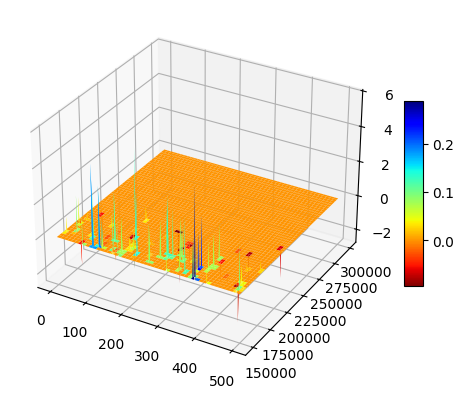

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NPM = 19102
np.random.seed(NPM)

makan = pd.read_csv("makanan.csv")
# mohon ditambahkan (lagi) agar lebih beragam

budget = 1e6  # rupiah

wkenyang_base = 0.8
wrasa_base = 0.7
wsehat_base = 0.9  # simpangan lebih besar
wbosan_base = 0.2

skor_kumulatif = 0.0
SAMPLE_NUM = 500

sampleid = np.arange(0, SAMPLE_NUM)
# skor perorangan
skor = np.zeros(SAMPLE_NUM, dtype=np.double)
sisa = np.zeros(SAMPLE_NUM, dtype=np.double)
sehat = np.zeros(SAMPLE_NUM, dtype=np.double)
pilihankum = np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM = 150e3
SISA_MAKSIMUM = 300e3
bin_sisa = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=np.double)

for n in range(0, SAMPLE_NUM):
    budget = 1e6
    skor_kumulatif = 0
    skor_sehat = 0

    for i in range(0, 31):  # hari
        # makan pertama, pilih secara acak
        pilihan = np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif = skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan] \
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        resp_pilih[n][2*i] = pilihan  # ✅ sudah dibetulkan (pakai i)

        # makan kedua
        pilihan = np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang = np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa = np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat = np.random.normal(loc=wsehat_base + 0.2, scale=0.4)
        w_bosan = np.random.normal(loc=wbosan_base * 2, scale=0.2)
        skor_kumulatif = skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan] \
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        resp_pilih[n][2*i+1] = pilihan  # ✅ sudah dibetulkan (pakai i)

    # simpan hasil akhir simulasi untuk sampel ini
    sisa[n] = budget
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    # Aman dari indeks negatif / out of range
    idx = int((budget - SISA_MININUM) / 1000)
    if 0 <= idx < len(bin_sisa):
        resp_sehat[n][idx] = skor_sehat

# Visualisasi
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
Y, X = np.meshgrid(bin_sisa, sampleid)
surf = ax.plot_surface(
    X, Y, resp_sehat,
    cmap='jet_r',
    edgecolor='none'
)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

# TUGAS
# (1) cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif
# (2) cari titik-titik dengan sisa uang bulanan positif dari (1)
# (3) cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif
# (4) tampilkan jadwal makanan sesuai pilihan (resp_pilih)


In [4]:
# (1) indeks sampel yang punya skor kesehatan positif
indeks_sehat_positif = []

for n in range(SAMPLE_NUM):
    if np.any(resp_sehat[n] > 0):
        indeks_sehat_positif.append(n)

indeks_sehat_positif


[5,
 7,
 9,
 11,
 12,
 14,
 15,
 20,
 21,
 25,
 29,
 32,
 35,
 36,
 41,
 42,
 44,
 47,
 49,
 51,
 54,
 55,
 59,
 67,
 69,
 73,
 74,
 78,
 84,
 85,
 88,
 92,
 94,
 97,
 99,
 100,
 105,
 106,
 110,
 116,
 119,
 120,
 130,
 142,
 145,
 146,
 147,
 148,
 150,
 157,
 158,
 159,
 165,
 166,
 169,
 170,
 172,
 179,
 180,
 183,
 197,
 204,
 205,
 206,
 207,
 210,
 211,
 213,
 215,
 218,
 222,
 229,
 232,
 238,
 250,
 256,
 257,
 259,
 260,
 261,
 264,
 267,
 270,
 275,
 276,
 286,
 289,
 300,
 302,
 304,
 305,
 310,
 312,
 313,
 326,
 327,
 329,
 334,
 342,
 347,
 353,
 357,
 358,
 362,
 363,
 364,
 368,
 369,
 370,
 373,
 377,
 378,
 380,
 382,
 386,
 388,
 390,
 393,
 402,
 412,
 415,
 416,
 436,
 443,
 444,
 445,
 447,
 456,
 461,
 463,
 464,
 467,
 468,
 473,
 476,
 477,
 480,
 482,
 483,
 486,
 489,
 492,
 493,
 497]

kode di atas menggunakan sebuah loop untuk mengevaluasi seluruh 500 simulasi pola makan (dari indeks 0 sampai 499). Untuk setiap simulasi, nilai kesehatan kumulatif disimpan dalam variabel resp_sehat, resp_sehat berisi skor kesehatan tergantung kombinasi sisa uang dan pilihan makanan. np.any(resp_sehat[n] > 0) digunakan untuk memastikan apakah setidaknya ada satu nilai positif dalam skor kesehatan simulasi tersebut. Jika iya, indeks simulasi itu ditambahkan ke dalam list indeks_sehat_positif.

Hasil output seperti 5, 7, 9, 11, 12 menunjukkan bahwa simulasi-simulasi pada indeks tersebut berhasil menghasilkan skor kesehatan kumulatif yang positif.

In [5]:
indeks_sisa_dan_sehat = [
    n for n in indeks_sehat_positif if sisa[n] > 0
]

indeks_sisa_dan_sehat


[5,
 7,
 9,
 11,
 12,
 14,
 15,
 20,
 21,
 25,
 29,
 32,
 35,
 36,
 41,
 42,
 44,
 47,
 49,
 51,
 54,
 55,
 59,
 67,
 69,
 73,
 74,
 78,
 84,
 85,
 88,
 92,
 94,
 97,
 99,
 100,
 105,
 106,
 110,
 116,
 119,
 120,
 130,
 142,
 145,
 146,
 147,
 148,
 150,
 157,
 158,
 159,
 165,
 166,
 169,
 170,
 172,
 179,
 180,
 183,
 197,
 204,
 205,
 206,
 207,
 210,
 211,
 213,
 215,
 218,
 222,
 229,
 232,
 238,
 250,
 256,
 257,
 259,
 260,
 261,
 264,
 267,
 270,
 275,
 276,
 286,
 289,
 300,
 302,
 304,
 305,
 310,
 312,
 313,
 326,
 327,
 329,
 334,
 342,
 347,
 353,
 357,
 358,
 362,
 363,
 364,
 368,
 369,
 370,
 373,
 377,
 378,
 380,
 382,
 386,
 388,
 390,
 393,
 402,
 412,
 415,
 416,
 436,
 443,
 444,
 445,
 447,
 456,
 461,
 463,
 464,
 467,
 468,
 473,
 476,
 477,
 480,
 482,
 483,
 486,
 489,
 492,
 493,
 497]

Kode di atas digunakan untuk mengecek kembali apakah simulasi-simulasi tersebut juga memiliki sisa uang bulanan yang masih positif. Output yang muncul menunjukkan bahwa sebagian besar indeks dari tugas pertama tetap lolos pada tahap ini, seperti 5, 7, 9, 11, 12. Hal ini menunjukkan bahwa kategori pola makan yang sehat ternyata tidak selalu mahal karena individu-individu tersebut masih mampu menyisakan sebagian anggarannya.

In [6]:
if len(indeks_sisa_dan_sehat) > 0:
    skor_terbaik = -1e18
    indeks_terbaik = None

    for n in indeks_sisa_dan_sehat:
        if skor[n] > skor_terbaik:
            skor_terbaik = skor[n]
            indeks_terbaik = n

    indeks_terbaik, skor_terbaik
else:
    indeks_terbaik = None
    print("Tidak ada kombinasi yang sehat dan sisa uangnya positif.")


Kode di atas digunakan mencari sampel terbaik dari kelompok yang sudah sehat dan masih punya sisa uang. Kode mengecek setiap indeks dalam indeks_sisa_dan_sehat, lalu mencari mana yang memiliki nilai skor paling tinggi. Variabel skor_terbaik dan indeks_terbaik digunakan untuk menyimpan hasil sementara. Jika ditemukan skor yang lebih besar, nilainya diperbarui. Hasil akhirnya adalah satu indeks dengan kombinasi paling optimal—sehat, hemat, dan punya skor kumulatif tertinggi.

In [7]:

if indeks_terbaik is not None:
    jadwal_index = resp_pilih[indeks_terbaik].astype(int)

    data = []
    for hari in range(31):
        pagi = makan['makanan'][jadwal_index[2*hari]]
        malam = makan['makanan'][jadwal_index[2*hari+1]]
        data.append({
            "Hari": hari + 1,
            "Pagi": pagi,
            "Malam": malam
        })

    df_jadwal = pd.DataFrame(data)
    print("Jadwal makan untuk sampel terbaik (indeks:", indeks_terbaik, ")")
    display(df_jadwal)
else:
    print("Tidak ada kombinasi yang memenuhi syarat.")


Jadwal makan untuk sampel terbaik (indeks: 386 )


,Hari,Pagi,Malam
0,1,capcay,mieayam
1,2,penyetan,nasipadang
2,3,mieayam,dimsum
3,4,penyetan,nasipadang
4,5,capcay,martabak telur
5,6,nasipadang,mieayam
6,7,bakso,miinstan
7,8,bakso,ayamkecap
8,9,gorengan,ayamkremes
9,10,cireng,ayamkecap


kode di atas digunakan untuk menampilkan jadwal makan lengkap dari sampel dengan kombinasi terbaik yang sudah ditemukan pada tahap sebelumnya. Indeks terbaik tersebut digunakan untuk mengambil data pilihan makan pagi dan malam selama 31 hari dari array resp_pilih. Kemudian, kode menyusun data tersebut ke dalam bentuk tabel dengan kolom "Hari", "Pagi", dan "Malam". Untuk setiap hari ke-1 sampai ke-31. Seperti yang terlihat pada output, misalnya: hari pertama makan “roti” dan “warteg”, hari kedua “nasipadang” dan “mi instan”, dan seterusnya.